# Microsoft Movie Studios Analysis

**Authors:** Armun Shakeri
***

## Overview


This project analyzes current movie trends, budgets, gross income, and ratings in order to help Microsoft Studios best decide which movies to produce in its new upcoming studio. Analysis will show that if Microsoft studios produces movies that are in high demand positive gross profit will be reflected.



## Business Problem

Microsoft is seeking to enter into the movie industry and does not know what movies to create. We need to analyze what types of movies are currently trending, most popular movie genres, highest grossing movies of all time, highest budgeted movies, and movie title basics. For Microsoft's new movie studio to be profitable we need to pick a movie genre that is currently in demand and which movies had highest gross incomes, doing this ensures that the movie will have a positive inception and be profitable.  


## Data Understanding

The following files imported are from various film rating institutions that will help identify what type of movie
Microsoft Studios should create next. These files include information on income, genres, ratings, and movie budgets. We intend to use variables mostly related to domestic gross income since we want Microsoft's first film to be profitable within the United States. 

In [38]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [39]:
# Here we run code to explore the data

income = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', error_bad_lines=False)
basics = pd.read_csv('zippedData/imdb.title.basics.csv', error_bad_lines=False)
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', error_bad_lines=False)
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', error_bad_lines=False)

In [40]:
# the target variables here are title and domestic_gross
income.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [41]:
#the target variables are primary title and genre

basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [42]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [43]:
budgets.info()
#the target variables are movie, production_budget, and domestic_gross

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

We are going to drop studio since microsoft will be using their own, year, and foreign_gross(income) since it is irrelevant in analyzing gross profit for a new movie within the United States.

In [44]:
income.drop(['studio', 'year', 'foreign_gross'], axis=1, inplace=True)

In [45]:
income.sort_values('domestic_gross', ascending=False).head(20)

,title,domestic_gross
1872,Star Wars: The Force Awakens,936700000.0
3080,Black Panther,700100000.0
3079,Avengers: Infinity War,678800000.0
1873,Jurassic World,652300000.0
727,Marvel's The Avengers,623400000.0
2758,Star Wars: The Last Jedi,620200000.0
3082,Incredibles 2,608600000.0
2323,Rogue One: A Star Wars Story,532200000.0
2759,Beauty and the Beast (2017),504000000.0
2324,Finding Dory,486300000.0


The new film will be focusing on the domestic US market so for the budgets data release_date and worldwide_gross will be the dropped variables. Domestic_gross income will also be dropped since we are going to combine budgets and income. 

In [46]:
budgets.drop(['id', 'release_date', 'domestic_gross', 'worldwide_gross'], axis=1, inplace=True)

In budgets we will drop id, realease_date, domestic_gross, and worldwide_gross since they are irrelevant for analysis. 

In [47]:
#rename 'movie' columns to title to merge income and budgets

budgets = budgets.rename(columns={'movie':'title'})

budgets.head()

,title,production_budget
0,Avatar,"$425,000,000"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000"
2,Dark Phoenix,"$350,000,000"
3,Avengers: Age of Ultron,"$330,600,000"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000"


In [48]:
#merge income and budgets by movie titles
movie_income_df = pd.merge(income, 
                              budgets, 
                              on=['title'], 
                              how='left')

movie_income_df.dropna().head()

#-convert production budget to integer.
#remove "$" and commas using str.replace method

,title,domestic_gross,production_budget
0,Toy Story 3,415000000.0,"$200,000,000"
3,Inception,292600000.0,"$160,000,000"
4,Shrek Forever After,238700000.0,"$165,000,000"
5,The Twilight Saga: Eclipse,300500000.0,"$68,000,000"
6,Iron Man 2,312400000.0,"$170,000,000"


In [49]:
#sort new dataframe by highest domestic gross income

movie_income_df.sort_values(by='domestic_gross', ascending=False).dropna().head(20)

,title,domestic_gross,production_budget
3089,Black Panther,700100000.0,"$200,000,000"
3088,Avengers: Infinity War,678800000.0,"$300,000,000"
1879,Jurassic World,652300000.0,"$215,000,000"
3091,Incredibles 2,608600000.0,"$200,000,000"
2331,Rogue One: A Star Wars Story,532200000.0,"$200,000,000"
2332,Finding Dory,486300000.0,"$200,000,000"
1881,Avengers: Age of Ultron,459000000.0,"$330,600,000"
732,The Dark Knight Rises,448100000.0,"$275,000,000"
1134,The Hunger Games: Catching Fire,424700000.0,"$130,000,000"
3090,Jurassic World: Fallen Kingdom,417700000.0,"$170,000,000"


We will need to combine basics and ratings using the common variable 'tconst'. Doing so we will be able to 
analyze ratings of different movies in specific genres. This will allow us to decide what type of genre Microsoft
studios should focus on when creating the new movie. 

In [50]:
basics.drop(['start_year', 'runtime_minutes', 'original_title'], axis=1, inplace=True)
ratings.drop(['numvotes'], axis=1, inplace=True)

In [51]:
#renamed 'primary_title' to 'title'
basics = basics.rename(columns={'primary_title':'title'})

basics.head()

,tconst,title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [52]:
ratings.head()

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


In order to accurately understand the ratings of each title we will need to combine basics and ratings by tconst. 

In [53]:
#merge movie ratings and basics, and drop all NaN values in average rating

movie_basics_df = pd.merge(basics, 
                              ratings, 
                              on=['tconst'], 
                              how='left')

movie_basics_df.sort_values(by='averagerating', ascending=False).dropna().head(20)


,tconst,title,genres,averagerating
87675,tt5089804,Fly High: Story of the Disc Dog,Documentary,10.0
120584,tt7259300,Calamity Kevin,"Adventure,Comedy",10.0
136750,tt8730716,Pick It Up! - Ska in the '90s,Documentary,10.0
144763,tt9715646,Renegade,Documentary,10.0
120109,tt7227500,Ellis Island: The Making of a Master Race in A...,"Documentary,History",10.0
4016,tt10378660,The Dark Knight: The Ballad of the N Word,"Comedy,Drama",10.0
117359,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,10.0
16767,tt1770682,Freeing Bernie Baran,"Crime,Documentary",10.0
1857,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.0
85426,tt4944240,Dog Days in the Heartland,Drama,10.0


Finally we will combine movie_income_df and movie_basics_df. This gives us a final dataframe with all the data we will need included within a central data set. 


In [54]:
movie_combined_df = pd.merge(movie_income_df, 
                              movie_basics_df, 
                              on=['title'], 
                              how='left')

movie_combined_df.drop(['tconst'], axis=1, inplace=True)
movie_combined_df = movie_combined_df.sort_values(by='domestic_gross', ascending=False).dropna().head(30) 
movie_combined_df

,title,domestic_gross,production_budget,genres,averagerating
3796,Black Panther,700100000.0,"$200,000,000","Action,Adventure,Sci-Fi",7.3
3795,Avengers: Infinity War,678800000.0,"$300,000,000","Action,Adventure,Sci-Fi",8.5
2282,Jurassic World,652300000.0,"$215,000,000","Action,Adventure,Sci-Fi",7.0
3798,Incredibles 2,608600000.0,"$200,000,000","Action,Adventure,Animation",7.7
2852,Rogue One: A Star Wars Story,532200000.0,"$200,000,000","Action,Adventure,Sci-Fi",7.8
2853,Finding Dory,486300000.0,"$200,000,000","Adventure,Animation,Comedy",7.3
2284,Avengers: Age of Ultron,459000000.0,"$330,600,000","Action,Adventure,Sci-Fi",7.3
894,The Dark Knight Rises,448100000.0,"$275,000,000","Action,Thriller",8.4
1385,The Hunger Games: Catching Fire,424700000.0,"$130,000,000","Action,Adventure,Sci-Fi",7.5
3797,Jurassic World: Fallen Kingdom,417700000.0,"$170,000,000","Action,Adventure,Sci-Fi",6.2


In order to make modeling this data easier, we will remove all "$" and "," from production_budget. We will also change the variable type of production_budget from string to integer.

In [55]:
movie_combined_df.production_budget=movie_combined_df.production_budget.str.replace("$","")

In [56]:
movie_combined_df.production_budget=movie_combined_df.production_budget.str.replace(",","")

In [57]:
movie_combined_df.production_budget=movie_combined_df.production_budget.astype(int)

In [58]:
movie_combined_df.head(30)

,title,domestic_gross,production_budget,genres,averagerating
3796,Black Panther,700100000.0,200000000,"Action,Adventure,Sci-Fi",7.3
3795,Avengers: Infinity War,678800000.0,300000000,"Action,Adventure,Sci-Fi",8.5
2282,Jurassic World,652300000.0,215000000,"Action,Adventure,Sci-Fi",7.0
3798,Incredibles 2,608600000.0,200000000,"Action,Adventure,Animation",7.7
2852,Rogue One: A Star Wars Story,532200000.0,200000000,"Action,Adventure,Sci-Fi",7.8
2853,Finding Dory,486300000.0,200000000,"Adventure,Animation,Comedy",7.3
2284,Avengers: Age of Ultron,459000000.0,330600000,"Action,Adventure,Sci-Fi",7.3
894,The Dark Knight Rises,448100000.0,275000000,"Action,Thriller",8.4
1385,The Hunger Games: Catching Fire,424700000.0,130000000,"Action,Adventure,Sci-Fi",7.5
3797,Jurassic World: Fallen Kingdom,417700000.0,170000000,"Action,Adventure,Sci-Fi",6.2


The above data set is the finished data set we will use in modeling. It has been arranged from highest grossing film to lowest and also shows the film's production budget, genre and average rating. 

# Data Modeling

In [59]:
movie_combined_df.describe()

,domestic_gross,production_budget,averagerating
count,3.000000e+01,3.000000e+01,30.000000
mean,4.374433e+08,1.744867e+08,7.103333
std,9.841788e+07,6.350902e+07,1.013183
min,3.524000e+08,5.800000e+07,4.200000
25%,3.681750e+08,1.500000e+08,6.925000
50%,4.085500e+08,1.750000e+08,7.300000
75%,4.422500e+08,2.000000e+08,7.650000
max,7.001000e+08,3.306000e+08,8.500000


Calculating the statistical methods (mean, median, mode...etc) will help create a general idea of where the movie industry is currently at in todays market. This is a good baseline to start analysis. 

In [60]:
productionbudgetloop = []

for production_budget in movie_combined_df['production_budget']:
    if production_budget <= 150000000:
        productionbudgetloop.append(1)
    elif production_budget <= 175000000:
        productionbudgetloop.append(2)
    elif production_budget <= 200000000:
        productionbudgetloop.append(3)
    else:
        productionbudgetloop.append(4)

movie_combined_df['production1'] = productionbudgetloop

movie_combined_df.head()

,title,domestic_gross,production_budget,genres,averagerating,production1
3796,Black Panther,700100000.0,200000000,"Action,Adventure,Sci-Fi",7.3,3
3795,Avengers: Infinity War,678800000.0,300000000,"Action,Adventure,Sci-Fi",8.5,4
2282,Jurassic World,652300000.0,215000000,"Action,Adventure,Sci-Fi",7.0,4
3798,Incredibles 2,608600000.0,200000000,"Action,Adventure,Animation",7.7,3
2852,Rogue One: A Star Wars Story,532200000.0,200000000,"Action,Adventure,Sci-Fi",7.8,3


Text(0.5, 1.0, 'production budgets compared to ratings')

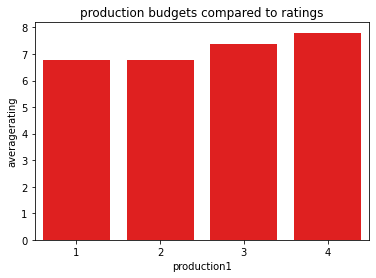

In [61]:
#figure 1
#in this figure we are comparing production budgets to ratings. Production budgets have been separated the amount
#film's production budgets were. From 25th, 50th, 75th and max. 

g = movie_combined_df.groupby('production1').mean() 
sns.barplot(x=g.index, y= "averagerating", data=g, color= 'red')
plt.title("production budgets compared to ratings")

As shown by figure one, the higher the film's production budget the higher rating the film will recieve. 

In [62]:
movie_combined_df.describe()

,domestic_gross,production_budget,averagerating,production1
count,3.000000e+01,3.000000e+01,30.000000,30.00000
mean,4.374433e+08,1.744867e+08,7.103333,2.20000
std,9.841788e+07,6.350902e+07,1.013183,1.15669
min,3.524000e+08,5.800000e+07,4.200000,1.00000
25%,3.681750e+08,1.500000e+08,6.925000,1.00000
50%,4.085500e+08,1.750000e+08,7.300000,2.00000
75%,4.422500e+08,2.000000e+08,7.650000,3.00000
max,7.001000e+08,3.306000e+08,8.500000,4.00000


Text(0.5, 1.0, 'Film(s) Production Budget')

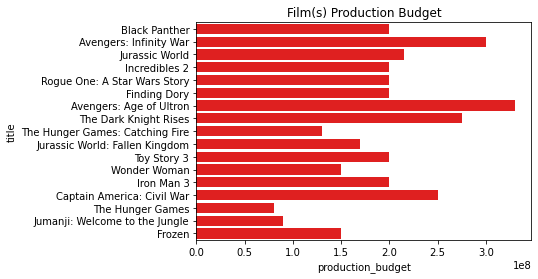

In [63]:
#figure 2
#movie_combined_df.groupby('title').sum().plot(kind='bar')
sns.barplot(y="title", x="production_budget", data=movie_combined_df[:20], color= 'red')
plt.title("Film(s) Production Budget")

Figure 1 shows the average production budget of top 20 films. 

Text(0.5, 1.0, 'Film Domestic Gross Proft')

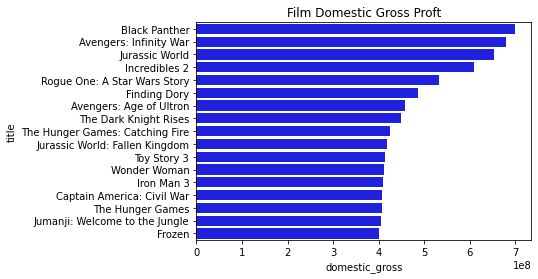

In [66]:
sns.barplot(y="title", x="domestic_gross", data=movie_combined_df[:20], color= 'blue')
plt.title("Film Domestic Gross Proft")

In figure 2 movies that are geared more towards the family demographic seem to have the highest domestic gross profits. 

In [67]:
#Figure 4

new_movie=movie_combined_df.groupby("genres").agg('mean')
new_movie

,domestic_gross,production_budget,averagerating,production1
genres,,,,
"Action,Adventure,Animation",6.086000e+08,2.000000e+08,7.700000,3.000000
"Action,Adventure,Comedy",3.838000e+08,7.400000e+07,7.500000,1.000000
"Action,Adventure,Fantasy",4.126000e+08,1.500000e+08,7.500000,1.000000
"Action,Adventure,Sci-Fi",4.947545e+08,2.064182e+08,7.272727,2.909091
"Action,Crime,Thriller",3.530000e+08,1.900000e+08,7.200000,3.000000
"Action,Thriller",4.481000e+08,2.750000e+08,8.400000,4.000000
"Adventure,Animation,Comedy",3.991667e+08,1.460000e+08,7.533333,1.833333
"Adventure,Drama,Sport",4.007000e+08,1.500000e+08,6.200000,1.000000
"Biography,Documentary,History",3.565000e+08,1.750000e+08,7.500000,2.000000


In figure 4 action, adventure, and animation genre has the highest domestic gross income among all the genres presented and also has the highest rating. 

In [ ]:
new_movie.reset_index(inplace=True)
new_movie.info()

In [ ]:
#figure 5
sns.barplot(y="genres", x="domestic_gross", data=new_movie)
plt.title("Genres and Their Respective Domestic Gross Profit")

Figure 4 shows the domestic gross profit among all the genres presented. We also see in this figure that action, adventure, and animation has the highest domestic gross profit by a fairly wide margin. 

In [ ]:
#Figure 6

sns.countplot(y="genres", data=movie_combined_df[:100], color= 'blue')
plt.xlabel("Count of Films")
plt.ylabel("Genres")
plt.title("Count of Film Genres")

#this basic scatter plot will also help us determine the genres. Will need to spread the x axis further apart. Also 
#right off the bat we see that the majority of films have some sort of action aspect. 
#50% of top 20 films fall under Action, Adventure, Scifi category

Figure 3 is a scatter plot that shows the genres of top 20 films. Currently in today's movie market there is a saturation of action, adventure and scifi movies. Microsoft should try to differentiate themselves by creating a movie that falls within a different genre. 

In [ ]:
#figure 7 

#We are trying to create 2 histograms, one with movie ratings of 7.0< and related production budgets, the other ratings of
#7.0> and production budgets. 

budget_profit_fig, budget_profit_axis = plt.subplots(nrows=1, ncols=2, figsize=(30,6))

budget_profit_axis[0].set_title('Movies with ratings of 7.0<' )
budget_profit_axis[0].set_ylabel('production_budget')
budget_profit_axis[0].set_xlabel('title')

budget_profit_axis[1].set_title('Movies with ratings of 7.0>')
budget_profit_axis[1].set_ylabel('production_budget')
budget_profit_axis[1].set_xlabel('title')

budget_profits_high = movie_combined_df['title'][movie_combined_df['averagerating'] > 7.0]
budget_profits_low = movie_combined_df['title'][movie_combined_df['averagerating'] < 7.0]

budget_profit_axis[0].hist(budget_profits_high, bins=10)
budget_profit_axis[1].hist(budget_profits_low, bins=30)

budget_profit_axis[0].tick_params(labelrotation=90)
budget_profit_axis[1].tick_params(labelrotation=90)


plt.show()


Figure 4 allows us to see if having a higher budget will reflect in the movie's rating. 

## Evaluation

    From the analysis above there is definetly a trend among top grossing films. Top grossing movies have more than one specific genre. For example, Black Panther and Jurassic World have action, scifi, and adventure as the genres. These are also family type films, this helps tremendously in attracting a large audience since it the film is targeting all ages. Top grossing films, that have a rating of above 7.0, also have production budgets of at least $100,000,000 with a mode of $200,000,000. Any more than a $300,000,000 the film will see diminishing returns with domestic profits since the average gross profit of films is $437,443,300. 
    
     These models can definetly be generealized beyond the data presented. There is a trend between top grossing films between production budget, rating and domestic gross income. Businesses can use this data to help decide which movies to create. If Microsoft decides to follow this model it will see its first film do very well and could possible save microsoft from allocating too much to the film's production budget. 

## Conclusions

The following below are three reccomendations for Microsoft Studio's first film: 

    1) The film should have a maximum budget of $200,000,000. The film will need to have a large budget to allocate to  hiring top actors and having up to date visual affects. 
    
    2) The film's genre should be action, adventure, and animation. Having aspects of several genres will help the film attract a larger audience.
    
    3) The film should be a family type of movie. Genres that contain aspects of action, adventure, and animation  are also geard more towards the family demographic, and like point #2 if the film is geared strictly for an older audience it will have a smaller target audience. Our goal is for Microsoft's first movie to to have a broad target audience.
    
This analysis might not fully solve Microsoft's initial problem since it does not factor in outlier genres such as documentaries and horror films. In the future we could target more types of niche genres in this analysis to help Microsoft explore other parts of the film industry especially when it comes to creating a "unique" film that does not follow the same pattern of typical top grossing films. 